### PCA ( Principal Component Analysis )

![capture](./Capture.png)
![capture2](./Capture2.png)
![capture3](./Capture3.png)
![capture4](./Capture4.png)
![capture5](./Capture5.png)
![capture6](./Capture6.png)
![capture7](./Capture7.png)
![capture8](./Capture8.png)
![capture9](./Capture9.png)
![capture10](./Capture10.png)
![gif](./nagesh-pca-5.gif)
![pic10](./nagesh-pca-6.png)

### calculate eigen vector and eigen values of the matrix

In [77]:
import numpy as np 
import matplotlib.pyplot as plt

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


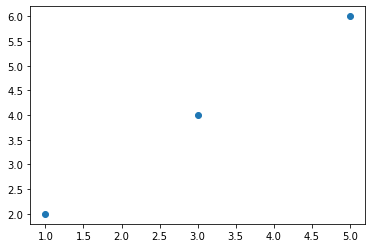

In [78]:
# Let calculate eigenvectors and eigen values of the small dataset
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
print(A)
plt.scatter(A[:,0],A[:,1])

In [79]:
# Calculate the mean of each column
mean = np.mean(A.T,axis = 1)
mean

array([3., 4.])

(3, 2)
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


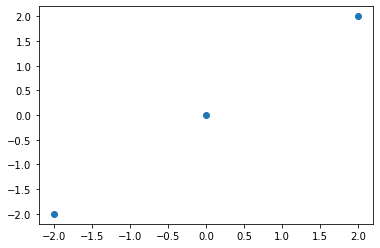

In [80]:
# move hold dataset into zero mean
C= A - mean
print(C.shape)
print(C)
plt.scatter(C[:,0],C[:,1])

In [81]:
# Calculate covariance matrix of new center matrix
V = np.cov(C.T)
print(V.shape)
print(V)

(2, 2)
[[4. 4.]
 [4. 4.]]


In [82]:
# Calculate eigen vectors and eigen values
values,vectors = np.linalg.eig(V)
print(values)
print(vectors)

[8. 0.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Large samples

(300, 2)


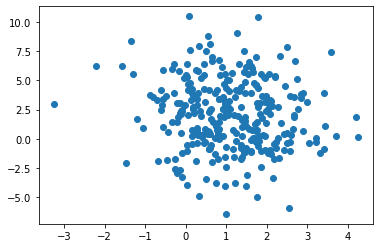

In [182]:
# create a gaussian 2d 
mean = [1,2]
cov = np.array([[1,0],[0,10]]) # covariance matrix
X = np.random.multivariate_normal(mean,cov,size = 300)
print(X.shape)
plt.scatter(X[:,0],X[:,1])

In [183]:
# Calculate the mean of each column
mean = np.mean(X,axis = 0)
mean

array([1.06489689, 2.03988674])

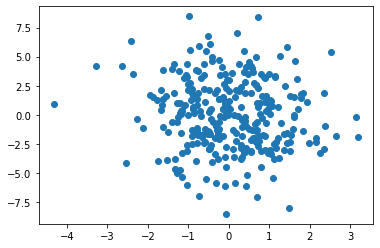

In [184]:
C = X - mean
plt.scatter(C[:,0],C[:,1])

In [185]:
X_dash = X - mean
print(X_dash.shape)

(300, 2)


In [186]:
S = 1/len(X_dash) * X_dash.T @ X_dash
print(S.shape)
print(S)

(2, 2)
[[ 1.20494385 -0.29339236]
 [-0.29339236  8.9358651 ]]


In [187]:
V = np.cov(C.T)
print(V.shape)
print(V)

(2, 2)
[[ 1.20897376 -0.29437361]
 [-0.29437361  8.96575094]]


In [188]:
lamb,u = np.linalg.eig(S) # eigenvector,eigenvalue calculated by covariance matrix, each eigen vector is column

In [189]:
lamb

array([1.19382545, 8.9469835 ])

In [190]:
u

array([[-0.99928272,  0.03786882],
       [-0.03786882, -0.99928272]])

In [191]:
# othorgonal matrix aka eigenvector u
u[:,0].T @ u[:,0]

1.0000000000000002

In [192]:
S @ u[:,0]

array([-1.19296914, -0.04520876])

In [193]:
u[:,0] * lamb[0]

array([-1.19296914, -0.04520876])

In [239]:
u[:,0]@u[:,1]

-1.3877787807814457e-17

(300,)
[-3.02130626  2.52432806  3.76135061  1.80882919 -1.9287647  -2.75942639
 -0.48696248 -0.67964139  3.15977236 -2.14057222]
8.946983501295804


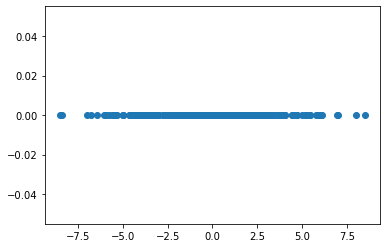

In [241]:
# find a project of dataset into 1 dimension
X_projected = X_dash @ u.T[-1]
print(X_projected.shape)
print(X_projected[:10])
print(np.var(X_projected))
plt.scatter(X_projected,np.zeros(X_projected.shape))

In [203]:
mean_xdash = np.mean(X_dash,axis = 0)
mean_xdash

array([8.14163551e-17, 1.06433381e-15])

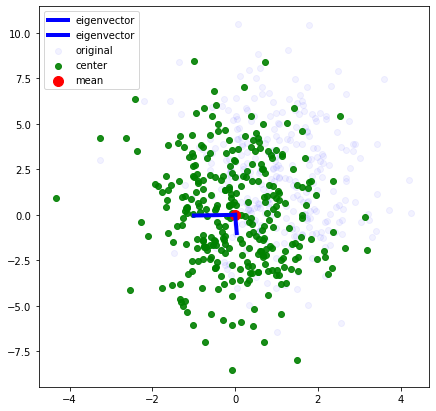

In [238]:
# mean
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1],alpha = 0.05,label = 'original',c = 'b')
plt.scatter(X_dash[:,0],X_dash[:,1],alpha = 0.9,label = 'center',c = 'g')
plt.scatter(mean_xdash[0],mean_xdash[1],c = 'r',s = 100,label = 'mean')
plt.plot([mean_xdash[0],u[:,0][0]],[mean_xdash[1],u[:,0][1]],'-',c = 'b',linewidth = 4,label = 'eigenvector')
plt.plot([mean_xdash[0],u[:,1][0]],[mean_xdash[1],u[:,1][1]],'-',c = 'b',linewidth = 4,label = 'eigenvector')
plt.legend(loc ='best')
plt.show()

In [155]:
from sklearn.decomposition import PCA

In [240]:
# define matrix
print(X.shape)
# create pca instance
pca = PCA(n_components =1)
# fit data
pca.fit(X)
# access value and vector
print(pca.components_)
print(pca.explained_variance_)
# transform data
X_projected = pca.transform(X)
print(X_projected.shape)

(300, 2)
[[-0.03786882  0.99928272]]
[8.97690652]
(300, 1)


In [243]:
# generate a dummy dataset
X = np.random.randint(10,50,100).reshape(20,5)
X

array([[17, 34, 43, 28, 29],
       [25, 28, 46, 44, 23],
       [37, 17, 13, 14, 47],
       [13, 17, 39, 39, 39],
       [32, 46, 47, 26, 21],
       [48, 31, 33, 13, 18],
       [48, 46, 31, 14, 17],
       [43, 49, 24, 19, 22],
       [37, 33, 40, 43, 36],
       [39, 23, 14, 48, 36],
       [35, 47, 27, 35, 43],
       [31, 21, 36, 47, 49],
       [44, 21, 11, 12, 17],
       [26, 47, 13, 44, 44],
       [35, 29, 34, 20, 48],
       [27, 15, 43, 28, 47],
       [17, 27, 27, 29, 32],
       [17, 32, 15, 37, 28],
       [14, 43, 10, 41, 35],
       [34, 49, 20, 27, 49]])

In [244]:
# meaning centering the data
X_meaned = X - np.mean(X,axis = 0)
X_meaned

array([[-13.95,   1.25,  14.7 ,  -2.4 ,  -5.  ],
       [ -5.95,  -4.75,  17.7 ,  13.6 , -11.  ],
       [  6.05, -15.75, -15.3 , -16.4 ,  13.  ],
       [-17.95, -15.75,  10.7 ,   8.6 ,   5.  ],
       [  1.05,  13.25,  18.7 ,  -4.4 , -13.  ],
       [ 17.05,  -1.75,   4.7 , -17.4 , -16.  ],
       [ 17.05,  13.25,   2.7 , -16.4 , -17.  ],
       [ 12.05,  16.25,  -4.3 , -11.4 , -12.  ],
       [  6.05,   0.25,  11.7 ,  12.6 ,   2.  ],
       [  8.05,  -9.75, -14.3 ,  17.6 ,   2.  ],
       [  4.05,  14.25,  -1.3 ,   4.6 ,   9.  ],
       [  0.05, -11.75,   7.7 ,  16.6 ,  15.  ],
       [ 13.05, -11.75, -17.3 , -18.4 , -17.  ],
       [ -4.95,  14.25, -15.3 ,  13.6 ,  10.  ],
       [  4.05,  -3.75,   5.7 , -10.4 ,  14.  ],
       [ -3.95, -17.75,  14.7 ,  -2.4 ,  13.  ],
       [-13.95,  -5.75,  -1.3 ,  -1.4 ,  -2.  ],
       [-13.95,  -0.75, -13.3 ,   6.6 ,  -6.  ],
       [-16.95,  10.25, -18.3 ,  10.6 ,   1.  ],
       [  3.05,  16.25,  -8.3 ,  -3.4 ,  15.  ]])

In [247]:
# calculating the covariance matrix of the mean centered data
cov_mat = np.cov(X_meaned,rowvar = False)
print(cov_mat.shape)
cov_mat

(5, 5)


array([[123.52368421,  20.09210526, -12.98421053, -72.87368421,
        -34.57894737],
       [ 20.09210526, 139.35526316, -18.76315789,  -6.57894737,
        -28.42105263],
       [-12.98421053, -18.76315789, 160.11578947,   8.97894737,
        -14.52631579],
       [-72.87368421,  -6.57894737,   8.97894737, 148.77894737,
         52.05263158],
       [-34.57894737, -28.42105263, -14.52631579,  52.05263158,
        133.26315789]])

In [248]:
# Calculating eigenvalues, eigenvectors of the convariance matrix
eigen_values,eigen_vectors = np.linalg.eig(cov_mat)

In [249]:
eigen_values

array([253.71524973,  58.15110067,  86.73513855, 136.67140895,
       169.76394421])

In [250]:
eigen_vectors

array([[ 0.53439827,  0.67167851, -0.47273   ,  0.19866512,  0.0180273 ],
       [ 0.26768708, -0.20687638, -0.32798038, -0.82851669,  0.30254712],
       [-0.11463271, -0.04563993, -0.32528712, -0.22886898, -0.90916644],
       [-0.63423479,  0.66785203,  0.08279208, -0.36477562,  0.10864673],
       [-0.47683088, -0.24070895, -0.74584783,  0.2977415 ,  0.26410703]])

In [257]:
# sort eigenvalues and eigenvectors
sorted_index = np.argsort(eigen_values)[::-1] # [::-1] revert it into ascending is False
sorted_index

array([0, 4, 3, 2, 1], dtype=int64)

In [258]:
sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_values

array([253.71524973, 169.76394421, 136.67140895,  86.73513855,
        58.15110067])

In [260]:
sorted_eigen_vectors = eigen_vectors[sorted_index]
sorted_eigen_vectors

array([[ 0.53439827,  0.67167851, -0.47273   ,  0.19866512,  0.0180273 ],
       [-0.47683088, -0.24070895, -0.74584783,  0.2977415 ,  0.26410703],
       [-0.63423479,  0.66785203,  0.08279208, -0.36477562,  0.10864673],
       [-0.11463271, -0.04563993, -0.32528712, -0.22886898, -0.90916644],
       [ 0.26768708, -0.20687638, -0.32798038, -0.82851669,  0.30254712]])

In [262]:
# select the first n eigenvectors, n is descired dimension of our final reduced data
n_components = 2 
eigenvector_subset = sorted_eigen_vectors[:,0:n_components]
eigenvector_subset

array([[ 0.53439827,  0.67167851],
       [-0.47683088, -0.24070895],
       [-0.63423479,  0.66785203],
       [-0.11463271, -0.04563993],
       [ 0.26768708, -0.20687638]])

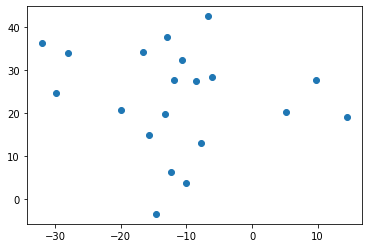

In [265]:
# transform data
X_reduced = X @ eigenvector_subset
#X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
plt.scatter(X_reduced[:,0],X_reduced[:,1])

### PCA

In [266]:
# import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load dataset 
dataset = pd.read_csv('./Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Alcohol : float64
Malic_Acid : float64
Ash : float64
Ash_Alcanity : float64
Magnesium : int64
Total_Phenols : float64
Flavanoids : float64
Nonflavanoid_Phenols : float64
Proanthocyanins : float64
Color_Intensity : float64
Hue : float64
OD280 : float64
Proline : int64
Customer_Segment : int64


<AxesSubplot:>

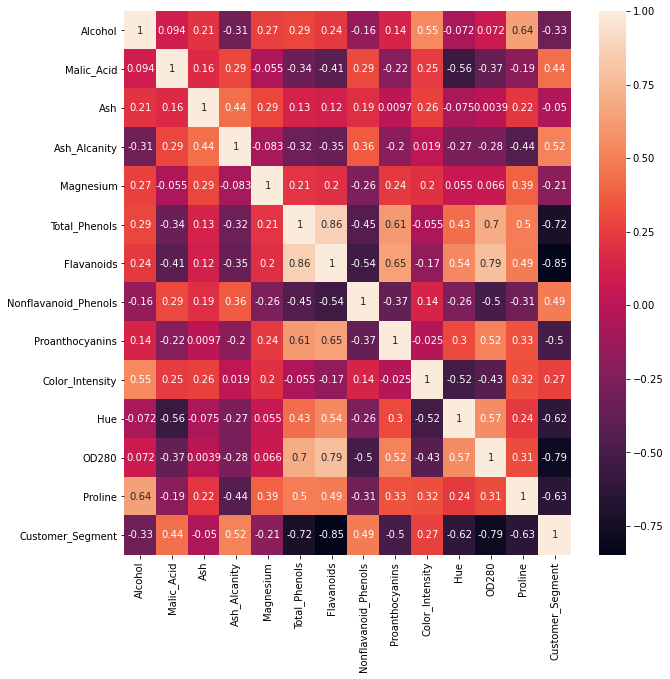

In [21]:
# inspect dataset
name_type  = zip(dataset.columns,dataset.dtypes)
# print out column name and column type
for col_name,col_type in name_type:
    print(col_name,':',col_type)

plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(),annot = True)

In [24]:
# Check the value of label
dataset['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

In [28]:
# distributing the dataset into two components X and Y
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values
print(f'X.shape: {X.shape}')
print(X[:4])
print(f'y.shape: {y.shape}')
print(y[:4])

X.shape: (178, 13)
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]
y.shape: (178,)
[1 1 1 1]


In [29]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 32)
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")
print(X_train[0])

X_train.shape: (142, 13)
y_train.shape: (142,)
X_test.shape: (36, 13)
y_test.shape: (36,)
[1.434e+01 1.680e+00 2.700e+00 2.500e+01 9.800e+01 2.800e+00 1.310e+00
 5.300e-01 2.700e+00 1.300e+01 5.700e-01 1.960e+00 6.600e+02]


In [33]:
# feature scaling, doing the pre-processing part on training and testing set such as fitting the standard scale
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [36]:
X_train[0]

array([ 1.64984766, -0.56561051,  1.15853681,  1.51031151, -0.09137131,
        0.81499322, -0.70663084,  1.27586392,  1.93725036,  3.29858567,
       -1.70761002, -0.91976247, -0.23846497])

In [37]:
## Apply the PCA function applying PCA function into the training and testing set to analysis
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

explained_variance = pca.explained_variance_ratio_
explained_variance

X_train.shape: (142, 2)
X_test.shape: (36, 2)


array([0.35703208, 0.19874915])

Text(0.5, 1.0, '2d training dataset')

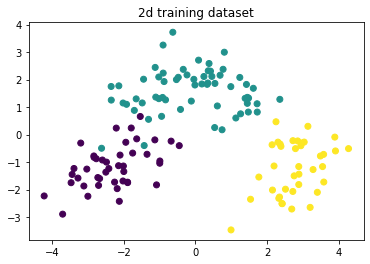

In [39]:
# visualize on training dataset
plt.scatter(X_train[:,0],X_train[:,1],c =y_train)
plt.title("2d training dataset")

In [40]:
# Fitting Logistic Regression to the training dataset 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [41]:
# predicting the test set result
# using predict function under LogisticrRegression
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3,
       3, 3, 2, 3, 1, 1, 1, 1, 3, 1, 3, 2, 1, 2], dtype=int64)

In [42]:
# Calculate the accuracy
np.sum(y_test == y_pred)/len(y_test)

0.8611111111111112

<AxesSubplot:>

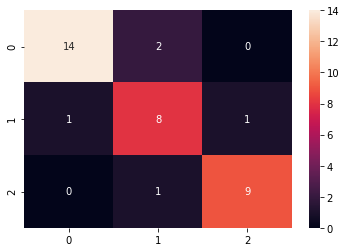

In [45]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [46]:
# Predicting the training set 
#result through scatter plot
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(10, 11)
(10, 11)


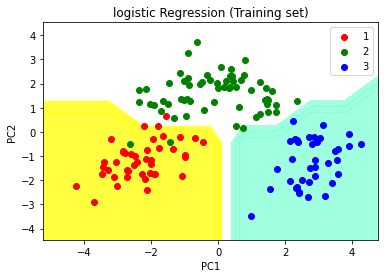

In [47]:
X_set,y_set  = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1),
                   np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1)
                   )
print(X1.shape)
print(X2.shape)
# predict and draw color
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,
             cmap = ListedColormap(('yellow','white','aquamarine'))
            )
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
# plot points
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set ==j,1],
               c = ListedColormap(('red','green','blue'))(i),label = j
               )
plt.title('logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show the legend
# show the plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(8, 10)
(8, 10)


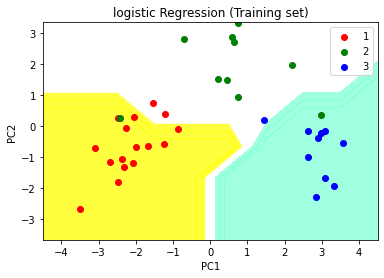

In [48]:
# Visualie the test set
X_set,y_set  = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1),
                   np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1)
                   )
print(X1.shape)
print(X2.shape)
# predict and draw color
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,
             cmap = ListedColormap(('yellow','white','aquamarine'))
            )
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
# plot points
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set ==j,1],
               c = ListedColormap(('red','green','blue'))(i),label = j
               )
plt.title('logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show the legend
# show the plot
plt.show()

Example2

In [372]:
import pandas as pd

In [421]:
def PCA(X,num_components):
    '''
    Arguments:
        X --- (N,D) the original dataset
        num_components --- the reduced dimensions
    Return:
        X_reduced --- projected of X in eigenvectors
    
    '''
    # step1 find mean
    mean = np.mean(X,axis = 0)
    X_meaned = X -mean
    
    # step2 find the covariance matrix
    cov = 1/len(X) * X_meaned.T @ X_meaned #np.cov(X_meaned,rowvar = False)
    
    # step3 find the eigen values and eigen vector
    values,vectors = np.linalg.eig(cov)
    
    # sort eigen_values
    sorted_index = np.argsort(values)[::-1]
    sorted_eigen_values = values[sorted_index]
    sorted_eigen_vector = vectors[sorted_index]
    
    # project X to reduce the dimension
    X_reduce = X @ sorted_eigen_vector[:,:n_components]
    
    return  X_reduce

In [422]:
# get the url of iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
dataset.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [445]:
X = dataset.iloc[:,0:4]#dataset.values[:,:4]
y = dataset.iloc[:,-1]#dataset.values[:,-1]
X[:10]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [424]:
mean = np.mean(X,axis = 0)
mean

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [425]:
X_meaned = X -mean
X_meaned.shape

(150, 4)

In [426]:
cov = 1/len(X) * X_meaned.T @ X_meaned
print(cov.shape)
cov

(4, 4)


,sepal length,sepal width,petal length,petal width
sepal length,0.681122,-0.039007,1.265191,0.513458
sepal width,-0.039007,0.186751,-0.319568,-0.117195
petal length,1.265191,-0.319568,3.092425,1.287745
petal width,0.513458,-0.117195,1.287745,0.578532


In [427]:
values,vectors = np.linalg.eig(cov)

In [428]:
values

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

In [429]:
vectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [430]:
sorted_index = np.argsort(values)[::-1]
sorted_index

array([0, 1, 2, 3], dtype=int64)

In [431]:
sorted_eigen_values = values[sorted_index]
sorted_eigen_vector = vectors[sorted_index]

In [432]:
sorted_eigen_vector

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [433]:
X @ sorted_eigen_vector[:,:2]

,0,1
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378
3,2.764906,-5.003599
4,2.782750,-5.648648
...,...,...
145,7.455360,-5.502139
146,7.037007,-4.939703
147,7.275389,-5.393243
148,7.412972,-5.430600


In [446]:
mat_reduced  = PCA(X,2)
mat_reduced

,0,1
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378
3,2.764906,-5.003599
4,2.782750,-5.648648
...,...,...
145,7.455360,-5.502139
146,7.037007,-4.939703
147,7.275389,-5.393243
148,7.412972,-5.430600


In [449]:
df = pd.concat([mat_reduced,y],axis = 1)
df

,0,1,target
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa
...,...,...,...
145,7.455360,-5.502139,Iris-virginica
146,7.037007,-4.939703,Iris-virginica
147,7.275389,-5.393243,Iris-virginica
148,7.412972,-5.430600,Iris-virginica


<AxesSubplot:xlabel='0', ylabel='1'>

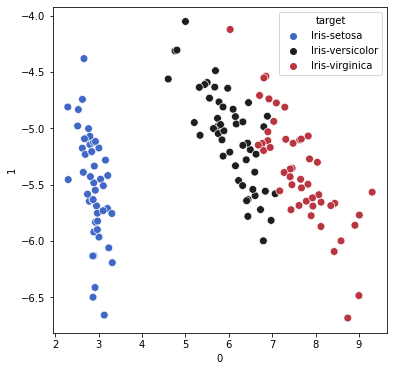

In [453]:
import seaborn as sns

plt.figure(figsize = (6,6))
sns.scatterplot(data = df, x = 0,y = 1,hue = 'target',s = 60, palette = 'icefire')

 use numpy linalg svd

In [463]:
u,s,v = np.linalg.svd(cov)

In [468]:
vectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [464]:
u

array([[-0.36158968, -0.65653988,  0.58099728,  0.31725455],
       [ 0.08226889, -0.72971237, -0.59641809, -0.32409435],
       [-0.85657211,  0.1757674 , -0.07252408, -0.47971899],
       [-0.35884393,  0.07470647, -0.54906091,  0.75112056]])

In [467]:
values

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

In [465]:
s

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

In [480]:
v

array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [481]:
x = dataset.values[:,:4]
target = dataset.values[:,-1]

In [482]:
x_meaned = x - np.mean(x,axis =0)
s = 1/len(x) * x_meaned.T @ x_meaned
print(s.shape)

(4, 4)


In [483]:
u,s,v = np.linalg.svd(s)

TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_f

In [484]:
u,s,v = np.linalg.svd(s.astype('float'))

In [485]:
u

array([[-0.36158968, -0.65653988,  0.58099728,  0.31725455],
       [ 0.08226889, -0.72971237, -0.59641809, -0.32409435],
       [-0.85657211,  0.1757674 , -0.07252408, -0.47971899],
       [-0.35884393,  0.07470647, -0.54906091,  0.75112056]])

In [486]:
s

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

In [487]:
v

array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

### eigenfaces

#### The Yale Face Database B is available at http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html<br> Download the cropped version and extract to a folder such as Your_YaleB_Path

In [15]:
import numpy as np 
import matplotlib.pyplot  as plt
from PIL import Image
from tqdm import tqdm
import os
import glob

In [16]:
IMG_PATH = './CroppedYale/'

In [17]:
images = []
floders = os.listdir(IMG_PATH)
for f in floders:
    #print(os.listdir(IMG_PATH + f))
    images += os.listdir(IMG_PATH + f)

In [18]:
len('yaleB07_P00A-120E+00.pgm')

24

In [19]:
images_pgm = []
# take all pgm
for i in images:
    if '.pgm' in i:
        images_pgm.append(i)
for i in images_pgm:
    if '.bad' in i or 'Ambient' in i or len(i) != 24:
        images_pgm.remove(i)

In [20]:
images_pgm

['yaleB01_P00A+000E+00.pgm',
 'yaleB01_P00A+000E+20.pgm',
 'yaleB01_P00A+000E+45.pgm',
 'yaleB01_P00A+000E+90.pgm',
 'yaleB01_P00A+000E-20.pgm',
 'yaleB01_P00A+000E-35.pgm',
 'yaleB01_P00A+005E+10.pgm',
 'yaleB01_P00A+005E-10.pgm',
 'yaleB01_P00A+010E+00.pgm',
 'yaleB01_P00A+010E-20.pgm',
 'yaleB01_P00A+015E+20.pgm',
 'yaleB01_P00A+020E+10.pgm',
 'yaleB01_P00A+020E-10.pgm',
 'yaleB01_P00A+020E-40.pgm',
 'yaleB01_P00A+025E+00.pgm',
 'yaleB01_P00A+035E+15.pgm',
 'yaleB01_P00A+035E+40.pgm',
 'yaleB01_P00A+035E+65.pgm',
 'yaleB01_P00A+035E-20.pgm',
 'yaleB01_P00A+050E+00.pgm',
 'yaleB01_P00A+050E-40.pgm',
 'yaleB01_P00A+060E+20.pgm',
 'yaleB01_P00A+060E-20.pgm',
 'yaleB01_P00A+070E+00.pgm',
 'yaleB01_P00A+070E+45.pgm',
 'yaleB01_P00A+070E-35.pgm',
 'yaleB01_P00A+085E+20.pgm',
 'yaleB01_P00A+085E-20.pgm',
 'yaleB01_P00A+095E+00.pgm',
 'yaleB01_P00A+110E+15.pgm',
 'yaleB01_P00A+110E+40.pgm',
 'yaleB01_P00A+110E+65.pgm',
 'yaleB01_P00A+110E-20.pgm',
 'yaleB01_P00A+120E+00.pgm',
 'yaleB01_P00A

Image shape: 192 x 168


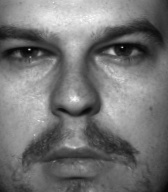

In [21]:
img = Image.open(IMG_PATH + 'yaleB21/yaleB21_P00A+005E+10.pgm')
print('Image shape: %d x %d' % (img.height,img.width))
img

In [ ]:
img.getdata()

generate the label y

In [23]:
print(len(images_pgm))
subjects = os.listdir(IMG_PATH)
print(len(subjects))

2414
38


In [36]:
# create function read a image name and return the value index, also the label of that image
def check_index(image,subjects):
    a = None
    for i in subjects:
        if i in image:
            a = subjects.index(i)
            break
        else:
            pass
    return a

In [37]:
'yaleB05' in 'yaleB05_P00A+035E+65.pgm'

True

In [38]:
e = 'yaleB05_P00A+035E+65.pgm'
e.split('_')[0]

'yaleB05'

In [39]:
#print(subjects)
img = images_pgm[np.random.choice(len(images_pgm))]
print(img)
a = check_index(img,subjects)
print(a)

yaleB36_P00A+000E+20.pgm
34


In [40]:
Y = [check_index(x,subjects) for x in images_pgm]
Y = np.array(Y)

In [41]:
os.path.join('a','b','c')

'a\\b\\c'

Convert the data from images to numpy matrix

In [65]:
dims = (192,168)
X = np.zeros((len(images_pgm),dims[0]*dims[1])) # ravel image

In [66]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
for j,i in enumerate(images_pgm):
    image = Image.open(IMG_PATH + i.split('_')[0] + '/' + i)
    if (image.height,image.width) != dims:
        image = image.resize(dims)
    X[j] = np.array(image.getdata())
    
print("X shape: " + str(X.shape))

X shape: (2414, 32256)


In [153]:
X[0]

array([80., 80., 84., ..., 12., 12., 11.])

In [154]:
np.array(image.getdata()).shape

(32256,)

##### In this tutorial, we just apply PCA for the feature engineering task. In practice, some image processing and augmentation techniques would be used to enhance the the performance

#### # We project the data to 100 dimensions associated with 100 eigenvectors corresponding to 100 greatest eigenvalues of the covariance matrix

In [155]:
mean = np.mean(X,axis = 0)
mean.shape

(32256,)

In [156]:
X_dash = X - mean

In [157]:
# X_dash = X_dash.astype('float16')
# X = X.astype('float16')

In [158]:
# MemoryError: Unable to allocate 1.94 GiB for an array with shape (32256, 32256) and data type float16
#cov = 1/len(X) * X_dash.T @ X #cov = np.cov(X,rowvar = False)

In [159]:
def MyPCA(X):
    mean = np.mean(X,axis = 0)
    U,S,V = np.linalg.svd(X - mean,full_matrices = False)
    return U,S,V,mean

In [160]:
# array type float16 is unsupported in linalg
#U,S,V,mean = MyPCA(X_dash)

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100) 

In [162]:
X_reduced = pca.fit_transform(X)

In [163]:
X_reduced.shape

(2414, 100)

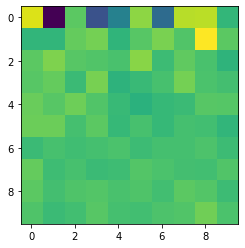

In [164]:
plt.imshow(X_reduced[np.random.choice(len(X))].reshape(10,10))

In [241]:
# projection matrix
U = pca.components_
U.shape

(100, 32256)

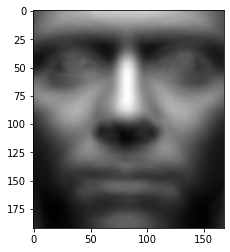

In [268]:
plt.imshow(U[np.random.choice(100)].reshape(192,168))
plt.savefig('eigenface.png',pad_inches = 'tight')

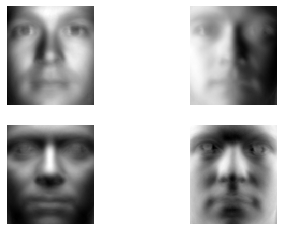

In [246]:
#plt.figure(figsize = (10,10))
plt.subplots(2,2)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    f1 = plt.imshow(U[i].reshape(192,168),interpolation = 'nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    #fn = 'eigenface' + str(i).zfill(2) + '.png'
    #plt.savefig(fn,bbox_inches = 'tight',pad_inches = 0)
    #plt.show()

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Train test split

In [217]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,Y,test_size = 0.33,random_state = 0)

#### Standardize
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [222]:
scaler = StandardScaler()

In [224]:
X_train = scaler.fit_transform(X_train)

In [225]:
X_test = scaler.fit_transform(X_test)

Try with some sklearn model

#### Logistic Regression

In [226]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Accuaracy on test: %.6f" %(np.sum(y_pred == y_test)/len(y_pred)))

Accuaracy on test: 0.954831


#### Support Vector Machine

In [227]:
?? SVC

In [228]:
clf = SVC(kernel = 'linear',C = 1.0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Accuaracy on test: %.6f" %(np.sum(y_pred == y_test)/len(y_pred)))

Accuaracy on test: 0.929737


In [229]:
clf = SVC(kernel = 'rbf',C = 1.0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Accuaracy on test: %.6f" %(np.sum(y_pred == y_test)/len(y_pred)))

Accuaracy on test: 0.932246


#### Neural network

Two hidden layers neural networks

Feel free to change the number units of hidden layers and observe how it will affect the performance.
Tips: Increase the number of parameters when the model under-fits the data and decrease the number of params when the model over-fits the data


In [230]:
clf = MLPClassifier(activation = 'logistic',hidden_layer_sizes = (850,50),random_state = 23, max_iter  = 200)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Accuaracy on test: %.6f" %(np.sum(y_pred == y_test)/len(y_pred)))

Accuaracy on test: 0.952321


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Using tensorflow

In [231]:
import tensorflow as tf 
from tensorflow.python.framework import ops

In [281]:
# hyper parameters
learning_rate = 0.001
num_steps = 300
batch_size = 128
display_step = 50

# Network parameters
n_hidden_1 = 850 # 1st layer number of neurons
n_hidden_2 = 50 # 2nd layer number  of neurons
num_input = 100 # 100 dimensions
num_classes = len(subjects)

In [282]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(num_input),
    tf.keras.layers.Dense(n_hidden_1,activation = 'relu'),
    tf.keras.layers.Dense(n_hidden_2,activation = 'relu'),
    tf.keras.layers.Dense(num_classes,activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 850)               85850     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                42550     
_________________________________________________________________
dense_11 (Dense)             (None, 38)                1938      
Total params: 130,338
Trainable params: 130,338
Non-trainable params: 0
_________________________________________________________________


In [283]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
             metrics  =['accuracy'])

In [284]:
history = model.fit(X_train,y_train,
          validation_data = (X_test,y_test),
          epochs = 10,
          verbose =True,)

Epoch 1/10
51/51 [==============================] - 1s 8ms/step - loss: 2.5648 - accuracy: 0.4762 - val_loss: 1.4552 - val_accuracy: 0.7842
Epoch 2/10
51/51 [==============================] - 1s 11ms/step - loss: 0.7307 - accuracy: 0.9079 - val_loss: 0.6066 - val_accuracy: 0.8971
Epoch 3/10
51/51 [==============================] - 0s 6ms/step - loss: 0.2796 - accuracy: 0.9685 - val_loss: 0.4027 - val_accuracy: 0.9197
Epoch 4/10
51/51 [==============================] - 0s 6ms/step - loss: 0.1498 - accuracy: 0.9864 - val_loss: 0.3239 - val_accuracy: 0.9247
Epoch 5/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0893 - accuracy: 0.9926 - val_loss: 0.2801 - val_accuracy: 0.9335
Epoch 6/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9920 - val_loss: 0.2629 - val_accuracy: 0.9335
Epoch 7/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0481 - accuracy: 0.9951 - val_loss: 0.2370 - val_accuracy: 0.9473
Epoch 8/10
51/51 [=

<AxesSubplot:>

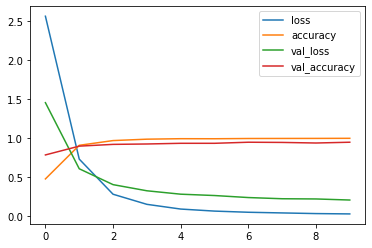

In [286]:
import pandas as pd
pd.DataFrame(history.history).plot()

### references

https://www.youtube.com/watch?v=Zbr5hyJNGCs

https://www.youtube.com/watch?v=cnCzY5M3txk

https://www.youtube.com/watch?v=T-B8muDvzu0

https://www.youtube.com/watch?v=rng04VJxUt4

https://www.youtube.com/watch?v=5aHWplWElcc

https://www.youtube.com/watch?v=R8zHEyT2R4E

https://www.youtube.com/watch?v=xI9-I-gcwaw

https://machinelearningcoban.com/2017/06/15/pca/

https://machinelearningcoban.com/2017/06/21/pca2/

https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/28_pca2/python/EigenFaces.ipynb

https://viblo.asia/p/gioi-thieu-principal-component-analysis-07LKXpq2KV4

https://www.geeksforgeeks.org/principal-component-analysis-with-python/

https://www.askpython.com/python/examples/principal-component-analysis

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

https://www.kdnuggets.com/2020/05/dimensionality-reduction-principal-component-analysis.html
